# EBAC - Regressão II - regressão múltipla

## Tarefa II

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from patsy import dmatrices

In [4]:
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop(columns = ['Unnamed: 0', 'data_ref'])

# Ajustando as variaveis categoricas
df = pd.get_dummies(df, columns=['sexo'])
df = pd.get_dummies(df, columns=['tipo_renda'])
df = pd.get_dummies(df, columns=['educacao'])
df = pd.get_dummies(df, columns=['estado_civil'])
df = pd.get_dummies(df, columns=['tipo_residencia'])



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     15000 non-null  int64  
 1   posse_de_veiculo               15000 non-null  bool   
 2   posse_de_imovel                15000 non-null  bool   
 3   qtd_filhos                     15000 non-null  int64  
 4   idade                          15000 non-null  int64  
 5   tempo_emprego                  12427 non-null  float64
 6   qt_pessoas_residencia          15000 non-null  float64
 7   renda                          15000 non-null  float64
 8   sexo_F                         15000 non-null  bool   
 9   sexo_M                         15000 non-null  bool   
 10  tipo_renda_Assalariado         15000 non-null  bool   
 11  tipo_renda_Bolsista            15000 non-null  bool   
 12  tipo_renda_Empresário          15000 non-null 

In [6]:
df

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,15056,False,True,0,26,6.602740,1.0,8060.34,True,False,...,False,True,False,False,False,True,False,False,False,False
1,9968,True,True,0,28,7.183562,2.0,1852.15,False,True,...,False,False,False,False,False,True,False,False,False,False
2,4312,True,True,0,35,0.838356,2.0,2253.89,True,False,...,False,False,False,False,False,True,False,False,False,False
3,10639,False,True,1,30,4.846575,3.0,6600.77,True,False,...,False,False,False,False,False,True,False,False,False,False
4,7064,True,False,0,33,4.293151,1.0,6475.97,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,16006,False,True,0,48,13.887671,1.0,7990.58,True,False,...,False,True,False,False,False,True,False,False,False,False
14996,3722,False,True,0,57,NaN,1.0,10093.45,True,False,...,False,True,False,False,False,True,False,False,False,False
14997,6194,True,True,0,45,7.832877,2.0,604.82,True,False,...,False,False,False,False,False,True,False,False,False,False
14998,4922,True,False,0,36,4.298630,2.0,3352.27,False,True,...,False,False,False,False,False,True,False,False,False,False


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

## 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [213]:
y = df['renda']
X = df[['sexo_F', 'sexo_M', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
,'educacao_Primário', 'educacao_Pós graduação', 'educacao_Secundário', 'educacao_Superior completo', 'educacao_Superior incompleto', 'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo','tipo_residencia_Aluguel', 'tipo_residencia_Casa', 'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio', 'tipo_residencia_Governamental', 'idade', 'tempo_emprego']]

# Remover linhas com nulos de X ou y
X = X.dropna()
y = y.dropna()

# Convertendo e INT
X = X.astype(int)

# Garantir que X e y ainda estão alinhados
X, y = X.align(y, join='inner', axis=0)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 9320
Tamanho do conjunto de teste: 3107


## 2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

In [67]:
# Lista de valores de alpha
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# lista de armazenamento de resultados
results = []

# Treinando o modelo Ridge
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((alpha, mse))

# Exibindo os resultados
print("Alpha | MSE")
for alpha, mse in results:
    print(f"{alpha:5} | {mse:.4f} | {r2:.4f}")

Alpha | MSE
    0 | 39900774.1640 | 0.2981
0.001 | 39829854.4915 | 0.2981
0.005 | 39829848.7835 | 0.2981
 0.01 | 39829841.6546 | 0.2981
 0.05 | 39829784.8586 | 0.2981
  0.1 | 39829714.4435 | 0.2981


In [169]:
print(X.columns)
print(X.shape)


Index(['Intercept', 'C(sexo, Treatment(1))[T.F]',
       'C(posse_de_veiculo, Treatment(1))[T.False]',
       'C(posse_de_imovel, Treatment(1))[T.False]',
       'C(estado_civil, Treatment(2))[T.Casado]',
       'C(estado_civil, Treatment(2))[T.Separado]',
       'C(estado_civil, Treatment(2))[T.União]',
       'C(estado_civil, Treatment(2))[T.Viúvo]', 'idade', 'qtd_filhos',
       'qt_pessoas_residencia', 'tempo_emprego'],
      dtype='object')
(12427, 12)


### Esse modelo aprezenda uma regularização do MSE para ambas os Alphas, demonstra um baixo nivel de over e underfitting.

## 3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

C:\Users\djang\anaconda3\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\djang\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\djang\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+11, tolerance: 8.060e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Alpha | MSE      | R^2
    0 | 39829855.9191 | 0.2966
0.001 | 39829836.1467 | 0.2966
0.005 | 39829759.6826 | 0.2966
 0.01 | 39829663.5989 | 0.2966
 0.05 | 39828917.6079 | 0.2966
  0.1 | 39828566.4635 | 0.2966


C:\Users\djang\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.504e+08, tolerance: 8.060e+07
  model = cd_fast.enet_coordinate_descent(


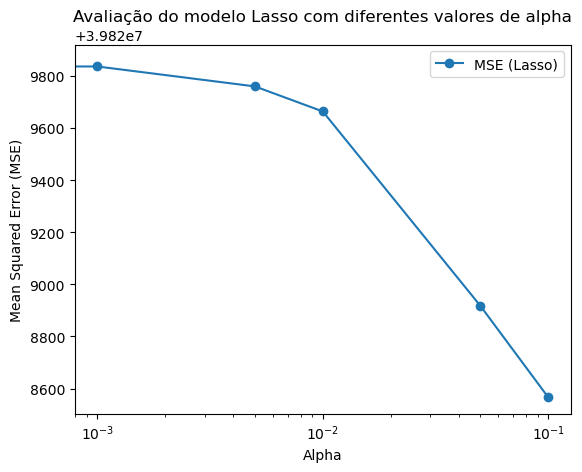

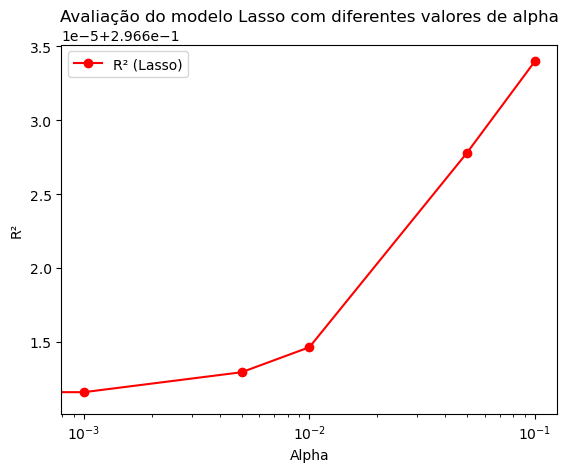

In [75]:
# Definir os valores de alpha a serem testados
alphas_lasso = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
results_lasso = []

# Treinar e avaliar o modelo Lasso para cada alpha
for alpha_lasso in alphas_lasso:
    lasso = Lasso(alpha=alpha_lasso)
    lasso.fit(X_train, y_train)  # Ajustar o modelo com o conjunto de treino
    y_pred = lasso.predict(X_test)  # Fazer previsões no conjunto de teste
    mse = mean_squared_error(y_test, y_pred)  # Calcular o MSE
    r2 = r2_score(y_test, y_pred)  # Calcular R^2
    results_lasso.append((alpha_lasso, mse, r2))

# Exibir os resultados
print("Alpha | MSE      | R^2")
for alpha_lasso, mse, r2 in results_lasso:
    print(f"{alpha_lasso:5} | {mse:.4f} | {r2:.4f}")

# Plotar a comparação do MSE
alphas_lasso, mse_values = zip(*[(result[0], result[1]) for result in results_lasso])
plt.plot(alphas_lasso, mse_values, marker='o', label='MSE (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Avaliação do modelo Lasso com diferentes valores de alpha')
plt.xscale('log')  # Usando escala logarítmica para melhor visualização
plt.legend()
plt.show()

# Plotar a comparação do R²
alphas, r2_values = zip(*[(result[0], result[2]) for result in results_lasso])
plt.plot(alphas_lasso, r2_values, marker='o', label='R² (Lasso)', color='red')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('Avaliação do modelo Lasso com diferentes valores de alpha')
plt.xscale('log')  # Usando escala logarítmica para melhor visualização
plt.legend()
plt.show()


### No modelo Lasso o MSE foi subindo mais o R² se manteve o mesmo. Ainda não é o modelo adequado. 

## 4. Rode um modelo *stepwise*. Avalie o $R^2$ na Base de testes. Qual o melhor resultado?

In [77]:
# Função para realizar a seleção stepwise
def stepwise_selection(X, y, direction='both', criterion='aic', verbose=True):
    """
    Realiza a seleção stepwise baseada no AIC ou BIC.
    direction: 'both', 'forward', 'backward' - direções da seleção
    criterion: 'aic' ou 'bic' - critério de avaliação
    verbose: Se True, imprime o progresso da seleção
    """
    initial_features = X.columns.tolist()
    best_features = []
    current_score, best_new_score = float('inf'), float('inf')
    
    while True:
        changed = False
        
        # Forward Stepwise: Adicionar uma variável
        if direction in ['both', 'forward']:
            scores_with_candidates = []
            for candidate in set(initial_features) - set(best_features):
                formula = 'y ~ ' + ' + '.join(best_features + [candidate])
                model = sm.OLS(y, sm.add_constant(X[best_features + [candidate]])).fit()
                score = model.aic if criterion == 'aic' else model.bic
                scores_with_candidates.append((score, candidate))

            scores_with_candidates.sort()
            best_new_score, best_candidate = scores_with_candidates[0]
            if best_new_score < current_score:
                best_features.append(best_candidate)
                current_score = best_new_score
                changed = True
                if verbose:
                    print(f'Add {best_candidate} with {current_score:.4f} AIC')

        # Backward Stepwise: Remover uma variável
        if direction in ['both', 'backward']:
            scores_with_candidates = []
            for candidate in best_features:
                formula = 'y ~ ' + ' + '.join([f for f in best_features if f != candidate])
                model = sm.OLS(y, sm.add_constant(X[best_features]).drop(candidate, axis=1)).fit()
                score = model.aic if criterion == 'aic' else model.bic
                scores_with_candidates.append((score, candidate))

            scores_with_candidates.sort()
            best_new_score, worst_candidate = scores_with_candidates[0]
            if best_new_score < current_score:
                best_features.remove(worst_candidate)
                current_score = best_new_score
                changed = True
                if verbose:
                    print(f'Remove {worst_candidate} with {current_score:.4f} AIC')

        if not changed:
            break

    return best_features

# Usar a função de seleção stepwise
best_features = stepwise_selection(X_train, y_train, direction='both', criterion='aic')

# Ajustar o modelo final com as melhores variáveis
model = sm.OLS(y_train, sm.add_constant(X_train[best_features])).fit()

# Fazer previsões e avaliar no conjunto de teste
y_pred = model.predict(sm.add_constant(X_test[best_features]))

# Avaliar a performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Modelo Stepwise com AIC:')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')


Add tempo_emprego with 195327.5973 AIC
Add sexo_F with 194222.9073 AIC
Add tipo_renda_Empresário with 194203.8050 AIC
Add idade with 194187.2734 AIC
Add educacao_Superior completo with 194178.2648 AIC
Add posse_de_imovel with 194176.1135 AIC
Add estado_civil_Casado with 194174.4351 AIC
Modelo Stepwise com AIC:
MSE: 39815977.8100
R²: 0.2969


### O modelo usando filtrou as melhores variaveis com base no AIC, porem o R² ainda esta baixo. Ainda não é um modelo viavel. 

## 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

In [87]:
print('Modelo Stepwise com AIC: R² 0.2969')

print("Modelo LASSO Alpha com MSE: R² 0.2966")

print("Modelo Ridge Alpha com MSE: R² 0.2981")


Modelo Stepwise com AIC: R² 0.2969
Modelo LASSO Alpha com MSE: R² 0.2966
Modelo Ridge Alpha com MSE: R² 0.2981


### O melhor modelo com base no R² é o RIDGE com o R² 0.2981.

## 6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [110]:
# criando um novo DataFrame
df_2 = pd.read_csv('previsao_de_renda.csv')
df_2 = df_2.drop(columns = ['Unnamed: 0', 'data_ref'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     15000 non-null  int64  
 1   posse_de_veiculo               15000 non-null  bool   
 2   posse_de_imovel                15000 non-null  bool   
 3   qtd_filhos                     15000 non-null  int64  
 4   idade                          15000 non-null  int64  
 5   tempo_emprego                  12427 non-null  float64
 6   qt_pessoas_residencia          15000 non-null  float64
 7   renda                          15000 non-null  float64
 8   sexo_F                         15000 non-null  bool   
 9   sexo_M                         15000 non-null  bool   
 10  tipo_renda_Assalariado         15000 non-null  bool   
 11  tipo_renda_Bolsista            15000 non-null  bool   
 12  tipo_renda_Empresário          15000 non-null 

### Usando Statusmodels para encontrar o melhor R².

In [133]:
# Fórmula para o modelo (TIREI AS VARIAVEIS COM O P-VALUE MENOR QUE 5%)
formula = (
    'np.log(renda) ~ idade + C(sexo, Treatment(1)) + C(posse_de_veiculo, Treatment(1)) + '
    'C(posse_de_imovel, Treatment(1)) + qtd_filhos + '
    'C(estado_civil, Treatment(2)) + '
    'qt_pessoas_residencia + tempo_emprego'
)

y,X = dmatrices(formula, data=df_2, return_type='dataframe')

# Exibir as primeiras linhas das matrizes
print("Variáveis independentes (X):")
print(X.head())
print("\nVariável dependente (y):")
print(y.head())

reg1 = sm.OLS(y,X).fit()
reg1.summary()

Variáveis independentes (X):
   Intercept  C(sexo, Treatment(1))[T.F]  \
0        1.0                         1.0   
1        1.0                         0.0   
2        1.0                         1.0   
3        1.0                         1.0   
4        1.0                         0.0   

   C(posse_de_veiculo, Treatment(1))[T.False]  \
0                                         1.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   

   C(posse_de_imovel, Treatment(1))[T.False]  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   

   C(estado_civil, Treatment(2))[T.Casado]  \
0                                      0.0   
1                             

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     600.2
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:50:48   Log-Likelihood:                -13666.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12415   BIC:                         2.745e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      7.8687      0.115     68.508      0.000       7.644       8.094
C(sexo, Treatment(1))[T.F]                    -0.7715      0.015    -52.631      0.000      -0.800      -0.743
C(posse_de_veiculo, Treatment(1))[T.False]    -0.0565      0.014     -3.985      0.000      -0.084      -0.029
C(posse_de_imovel, Treatment(1))[T.False]     -0.0868      0.014     -6.288      0.000      -0.114      -0.060
C(estado_civil, Treatment(2))[T.Casado]       -0.2533      0.110     -2.309      0.021      -0.468      -0.038
C(estado_civil, Treatment(2))[T.Separado]      0.0563      0.033      1.708      0.088      -0.008       0.121
C(estado_civil, Treatment(2))[T.União]        -0.2814      0.112     -2.517      0.012      -0.501      -0.062
C(estado_civil, Treatment(2))[T.Viúvo]         0.0784      0.045      1.731      0.084      -0.010       0.167
idade                                          0.0046      0.001      5.783      0.000       0.003       0.006
qtd_filhos                                    -0.2443      0.109     -2.247      0.025      -0.457      -0.031
qt_pessoas_residencia                          0.2677      0.109      2.466      0.014       0.055       0.480
tempo_emprego                                  0.0611      0.001     59.136      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.311
Skew:                           0.024   Prob(JB):                        0.519
Kurtosis:                       3.013   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### A Regressão com Stats Models R² 0.347 foi a melhor para esse banco de dados. 

In [128]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

# Adicionando a constante no conjunto de teste
X_test = sm.add_constant(X_test)

# Fazendo previsões
y_pred = model.predict(X_test)

# Calculando MSE e R² no conjunto de teste
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE no conjunto de teste: {mse:.4f}")
print(f"R² no conjunto de teste: {r2:.4f}")

MSE no conjunto de teste: 39829855.9191
R² no conjunto de teste: 0.2966


### A diferença da base de treinamento e teste é significativa, podendo resultar em overfiting. 

### Aplicando o melhor Alpha com RIDGE para melhorar o R².

In [221]:
# Definindo alphas
alphas = np.logspace(-4, 2, 50)

# Ajustando o modelo com validação cruzada
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

# Melhor alpha e desempenho no conjunto de teste
best_alpha = ridge_cv.alpha_
ridge_test_score = ridge_cv.score(X_test, y_test)

print(f"Melhor alpha: {best_alpha}")
print(f"R² no conjunto de teste: {ridge_test_score:.4f}")

Melhor alpha: 100.0
R² no conjunto de teste: 0.2976


## 7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [223]:
# Criando o modelo de árvore de regressão
tree = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
tree.fit(X_train, y_train)

# Previsões
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Avaliação do modelo
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Treino - MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Teste - MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

Treino - MSE: 15795696.9006, R²: 0.8173
Teste - MSE: 47026051.7146, R²: 0.1695
